In [89]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path

In [90]:
"""
Reading in data...
data and label are the two variables containing necessary information
data: a pandas dataframe object with rows/index = genes, columns = expression levels of all instances
label: a list, indices correspond to the columns in data
"""
adrenalDataDir = Path("unzipped_data/adrenal_gland")
kidneyDataDir = Path("unzipped_data/kidney")
adrenalData = list(adrenalDataDir.glob("*.txt"))
kidneyData = list(kidneyDataDir.glob("*.txt"))
data = pd.DataFrame(columns = ["gene", "exp"])
label = []
idx = 0
for item in adrenalData:
    instance = pd.read_csv(str(item), header = None, sep = "\t")
    instance.columns = ["gene",f"exp{idx}"]
    if idx == 0:
        data = instance.copy()
    else:
        data = data.join(instance.set_index('gene'), on = "gene")
    idx += 1
    label.append("adrenal")

for item in kidneyData:
    instance = pd.read_csv(str(item), header = None, sep = "\t")
    instance.columns = ["gene",f"exp{idx}"]
    if idx == 0:
        data = instance.copy()
    else:
        data = data.join(instance.set_index('gene'), on = "gene")
    idx += 1
    label.append("kidney")

data = data.set_index("gene")
assert not data.isnull().values.any(), "has some nan values"

In [103]:
#Full data
X = data

#Kidney only data can be ran by uncommenting the below line
# X = data.iloc[:,64:] #Kidney only data

#Labels can be changed by either using cluster labels (kmeans.labels_) or class label (label)

#Shape of data
print(X.shape)

(60483, 283)


In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.cluster import homogeneity_score

In [104]:
#Find the number of phenotypes in the data using objective function,
# an internal evalution measure (ex. silhouette).
results = []
XTranspose = X.to_numpy().T
for k in range(1,11):
  model = KMeans(n_clusters=k)
  kmeans = model.fit(XTranspose)
  #results.append(metrics.silhouette_score(XTranspose, kmeans.labels_,
                                 #metric="euclidean"))
  results.append(-model.score(XTranspose))

C:\Users\hyphy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [105]:
max_value = max(results)
k = results.index(max_value) + 2
print('The best value of k is ',k)
print("The Silhouette score is: %0.3f" % metrics.silhouette_score(XTranspose, kmeans.labels_))
kmeans = KMeans(n_clusters=k).fit(X)

The best value of k is  2
The Silhouette score is: 0.356


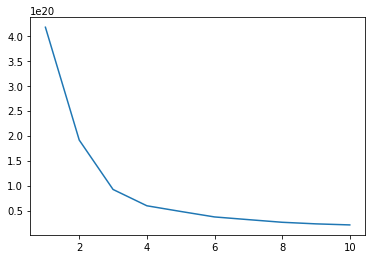

In [98]:
#Objective function is the y axis and cluster number on the x axis
plt.plot(range(1,11),results)
plt.show()

<AxesSubplot:xlabel='1st_dim', ylabel='2nd_dim'>

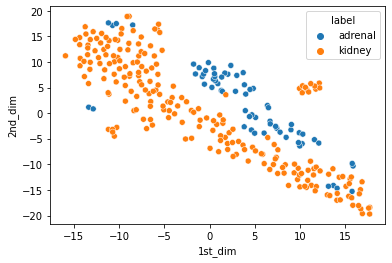

In [108]:
#Plot the tSNE plot
X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=300.0).fit_transform(X.to_numpy().T)
X_tsne.shape
df_plot = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1], label]).T
df_plot.columns = ['1st_dim', '2nd_dim', 'label']
sns.scatterplot(x='1st_dim', y='2nd_dim', hue = 'label',data=df_plot, legend="full")

In [100]:

model = KMeans(n_clusters=2)
kmeans = model.fit(XTranspose)
  #results.append(metrics.silhouette_score(XTranspose, kmeans.labels_,
                                 #metric="euclidean"))
results.append(-model.score(XTranspose))

<AxesSubplot:xlabel='1st_dim', ylabel='2nd_dim'>

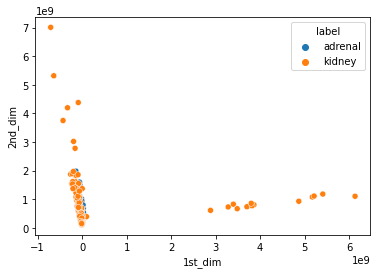

In [109]:
#Plot PCA
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(data.apply(lambda x: x-x.mean(), axis=1).to_numpy().T)
plot = XTranspose@model.components_.T
df_plot = pd.DataFrame([plot[:, 0], plot[:, 1], label]).T
df_plot.columns = ['1st_dim', '2nd_dim', 'label']
sns.scatterplot(x='1st_dim', y='2nd_dim', hue = 'label',data=df_plot, legend="full")

In [56]:
print(plot)

[[-1.02973323e+07  1.85648022e+08]
 [ 8.05539693e+06  2.01765223e+08]
 [-2.95974140e+07  3.62094526e+08]
 [-2.37229637e+07  3.19941614e+08]
 [-3.68392296e+07  3.53575089e+08]
 [-1.73895608e+07  4.44316471e+08]
 [-5.01636947e+07  1.49072319e+09]
 [-1.03029179e+07  1.50651940e+08]
 [-1.98577831e+07  3.03431425e+08]
 [-2.30037427e+07  2.87828356e+08]
 [-6.78153753e+07  1.38820689e+09]
 [-8.08622774e+07  6.63562840e+08]
 [-4.94764367e+07  3.50537886e+08]
 [-1.05626911e+07  1.94751022e+08]
 [ 2.41207072e+07  6.82994626e+08]
 [-1.22766034e+07  3.36548910e+08]
 [ 1.23253146e+07  2.43228457e+08]
 [-3.70381016e+07  5.04325743e+08]
 [ 4.00336774e+06  3.99071983e+08]
 [-5.71326328e+07  5.75879260e+08]
 [-2.99508384e+07  2.94168585e+08]
 [ 2.09148107e+06  7.30127587e+08]
 [-1.85317882e+07  3.13318791e+08]
 [-2.73280484e+07  5.72732293e+08]
 [-4.40189540e+07  7.30147035e+08]
 [-2.57258680e+07  9.69513209e+08]
 [-1.25325603e+07  7.59551333e+08]
 [-3.41927730e+07  4.13429505e+08]
 [-3.94418812e+06  3